<a href="https://colab.research.google.com/github/BDFL669/Data_Analysis_with_R/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CLustering in R

Clustering is a machine learning technique that falls under the category of unsupervised learning. In unsupervised learning, we work with datasets that consist of input data without labeled responses or target variables. This means that we do not have predefined categories or classes for the data.

The main objective of clustering is to identify meaningful patterns and structures within a dataset by grouping similar data points together and separating dissimilar data points. This is done without any prior knowledge of the underlying class labels or categories.

The process of clustering involves dividing a population or dataset into a number of distinct groups or clusters. The goal is to ensure that data points within the same cluster are more similar to each other compared to data points in different clusters. At the same time, data points in different clusters should be dissimilar or less similar to each other.

In this chapter, different clustering techniques in R are showcased, which encompass k-means clustering, k-medoids clustering, hierarchical clustering, and density-based clustering. The initial two sections illustrate the application of the k-means and k-medoids algorithms to cluster the iris dataset. Following that, the third section demonstrates an example of hierarchical clustering using the same dataset. Lastly, the concept of density-based clustering and the utilization of the DBSCAN algorithm are discussed, along with a demonstration of clustering using DBSCAN and assigning labels to new data points using the clustering model.

##K-Means Clustering
We begin by using the iris dataset for k-means clustering. In the code below, the species column is removed before we can implement the kmeans() method on the new dataset. We then store the clustering result inside kmeans.result and set the cluster number to 3.

In [1]:
iris2 <- iris
iris2$Species <- NULL
(kmeans.result <- kmeans(iris2, 3))

K-means clustering with 3 clusters of sizes 50, 38, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     6.850000    3.073684     5.742105    2.071053
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1] 15.15100 23.87947 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

The next step is to compare our clustering output with the Species label to check for classification accuracy. Based on the results, we can see that the 'setosa' cluster is the easiest to segment. However, the features of the 'virginica' and 'versicolor' clasters tend to overlap--albeit to a small degree.

In [2]:
 table(iris$Species, kmeans.result$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0  2 48
  virginica   0 36 14

Subsequently, the clusters and their centers are visualized in a plot (refer to the figure below). It is important to note that although the data contains four dimensions, only the first two dimensions are considered for the plot presented below. In the plot, certain black data points appear to be near the green centroid (marked as an asterisk); however, in the four-dimensional space, they may actually be closer to the black centroid. Additionally, it is crucial to acknowledge that the outcomes of k-means clustering can differ across different runs due to the random selection of initial cluster centroids.

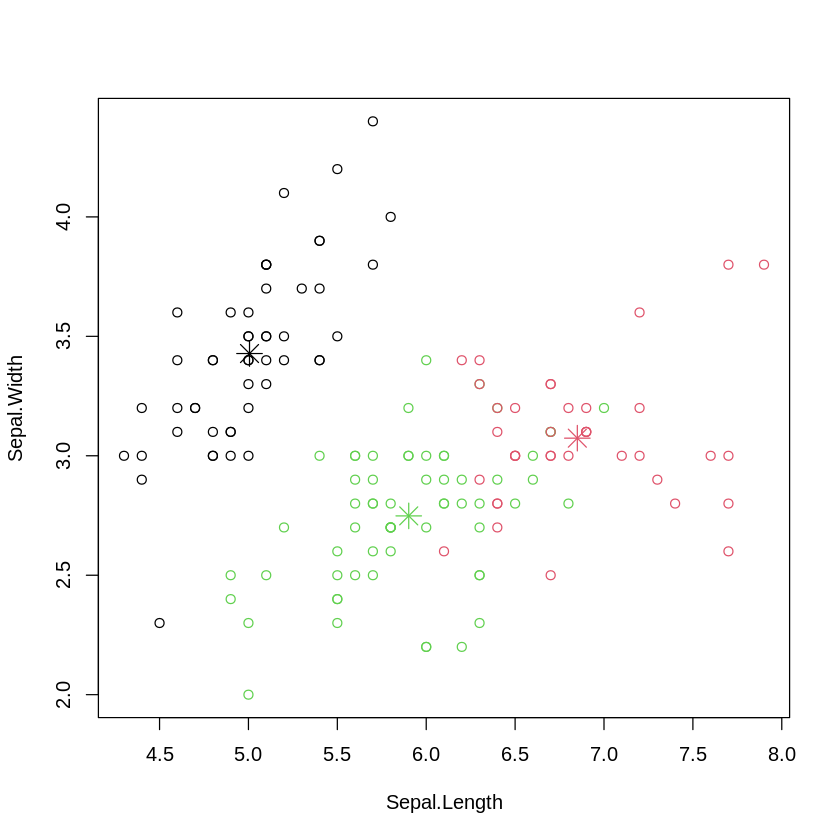

In [3]:
plot(iris2[c("Sepal.Length", "Sepal.Width")], col = kmeans.result$cluster)
# plot cluster centers
points(kmeans.result$centers[,c("Sepal.Length", "Sepal.Width")], col = 1:3,pch = 8, cex=2)

##The k-Medoids Clustering
In this section, k-medoids clustering is demonstrated using the functions `pam()` and `pamk()` in R. K-medoids clustering is similar to k-means clustering, but with a key difference: while k-means represents a cluster with its center, k-medoids represents a cluster with the data point closest to the center. This characteristic makes k-medoids more robust in the presence of outliers.

The PAM (Partitioning Around Medoids) algorithm is a classic approach for k-medoids clustering. However, it can be inefficient for clustering large datasets. To address this limitation, the CLARA algorithm is introduced. CLARA draws multiple samples of the data, applies the PAM algorithm to each sample, and returns the best clustering result. This approach performs better on larger datasets. In R, the functions `pam()` and `clara()` from the `cluster` package are implementations of PAM and CLARA, respectively.

To specify the desired number of clusters (k), the user needs to provide the value as input when using the `pam()` or `clara()` functions. However, an enhanced version called `pamk()` from the `fpc` package does not require the user to explicitly choose k. Instead, it estimates the optimal number of clusters using the average silhouette width.

The code snippet provided below demonstrates how to perform k-medoids clustering using the `pam()` and `pamk()` functions in R.

In [4]:
install.packages('fpc')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’




In [5]:
install.packages(c("cluster", "factoextra"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Matrix’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [6]:
library(fpc)
pamk.result <- pamk(iris2)
# number of clusters
pamk.result$nc


[1] 2

In [7]:
# check clustering against actual species
table(pamk.result$pamobject$clustering, iris$Species)

   
    setosa versicolor virginica
  1     50          1         0
  2      0         49        50

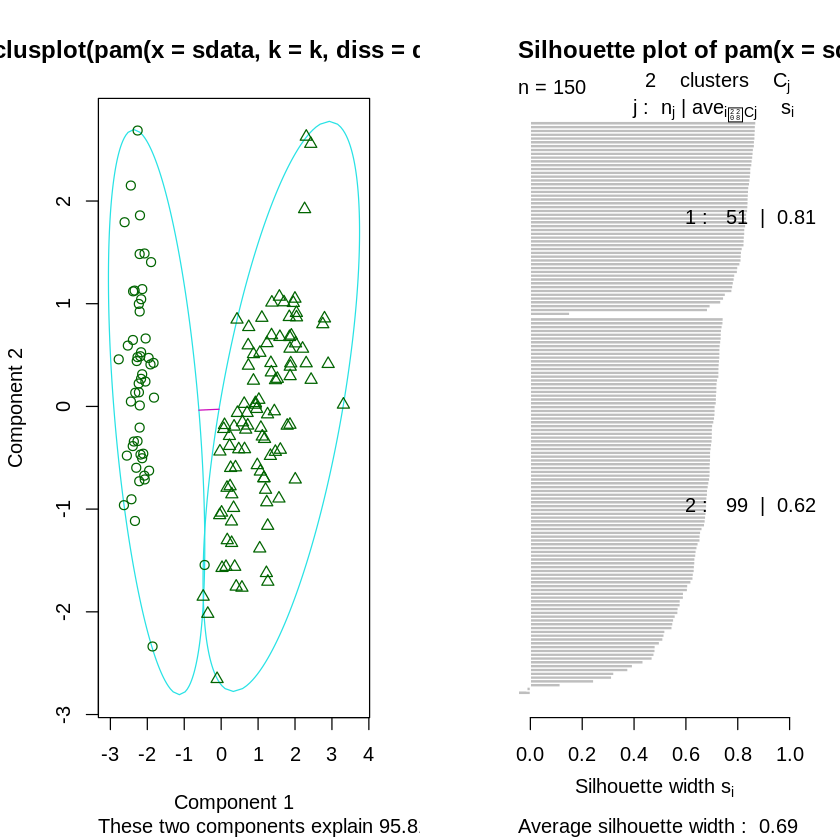

In [8]:
layout(matrix(c(1,2),1,2)) # 2 graphs per page
plot(pamk.result$pamobject)
layout(matrix(1)) # change back to one graph per page

In the above example, the function pamk() yields two clusters: one representing the "setosa" species and the other comprising a mixture of the "versicolor" and "virginica" species. The figure above showcases the results through two charts. The left chart, known as a "clusplot" or clustering plot, visualizes the two clusters in a 2-dimensional space, with lines indicating the distances between the clusters. The right chart displays the silhouettes of the clusters. The silhouette coefficient (si) measures the quality of clustering for each observation. A high si value close to 1 indicates that the observation is well-clustered, while a small si value around 0 suggests that the observation lies between two clusters. Observations with a negative si value are likely assigned to the wrong cluster. In the given silhouette, the average si values are 0.81 and 0.62 for the two clusters, indicating that the identified clusters are well-separated and appropriately clustered.

Let us now try pam() using k = 3.

In [9]:
library(cluster)
library(factoextra)
pam.result <- pam(iris2, 3)
table(pam.result$clustering, iris$Species)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

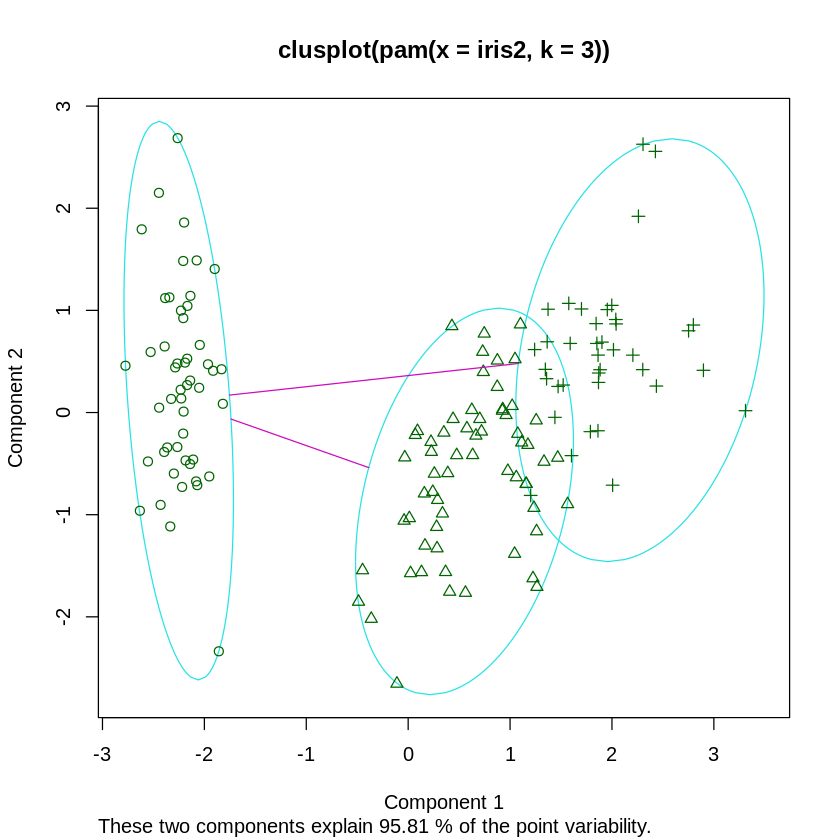

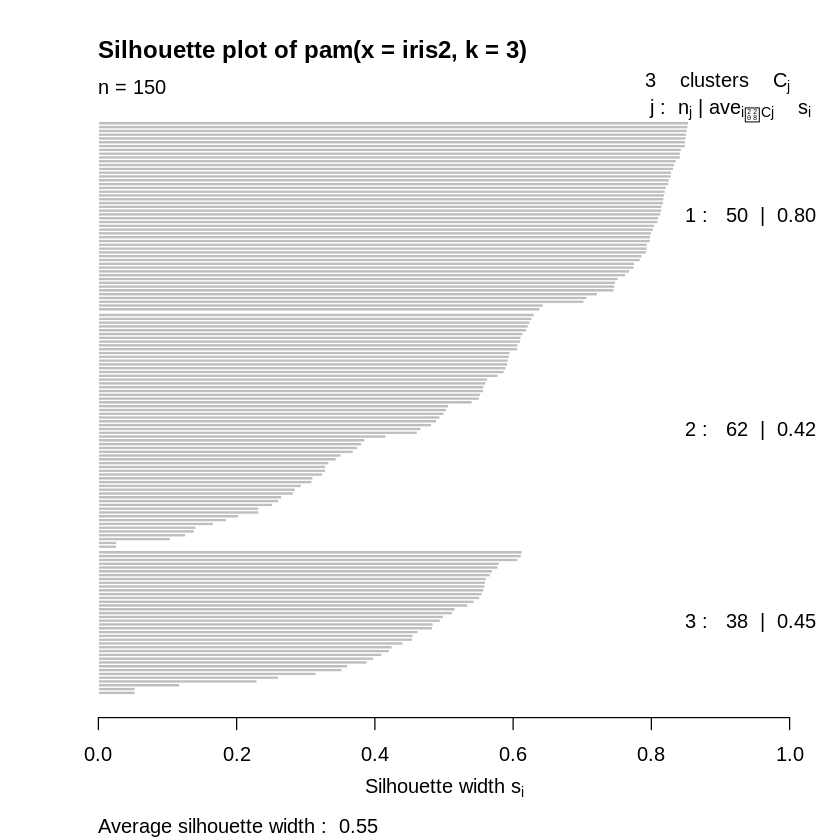

In [10]:
#layout(matrix(c(1,2),1,2)) # 2 graphs per page
plot(pam.result)
layout(matrix(1)) # change back to one graph per page

In the above outputs generated using pam(), we have a species 'setosa' cluster which is distinct from the other two clusters that primarily account for the 'versicolo' and 'virginica' clusters. I am still not sure whether pam() outperforms pamk() because the answer is contingent on domain knowledge and target problem. However, pam() seems is more ideallyic in our current context because it discerned between the three main clusters. The caveat is that we had to instruct pam() to use 3 clusters by initializing k as equal to 3. We already knew beforehand that there were three species in the iris dataset.

##Hierarchical Clustering
hclust() provides a veritable strategy for R data scientists to conduct hierarchical clustering. The preliminary step is to use the iris dataset to retrieve 40 samples to avoid ending up with an overcrowded clustering plot. Just like we did in the previus sections, we have to remove the species variable before performing the clustering.

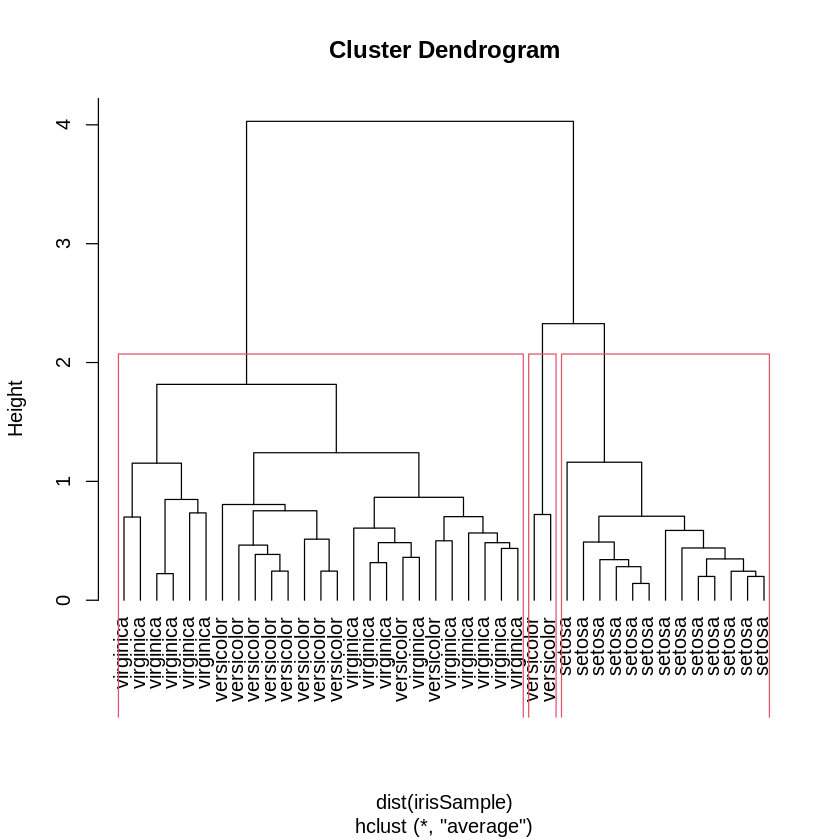

In [11]:
idx <- sample(1:dim(iris)[1], 40)
irisSample <- iris[idx,]
irisSample$Species <- NULL
hc <- hclust(dist(irisSample), method="ave")
plot(hc, hang = -1, labels=iris$Species[idx])
# cut tree into 3 clusters
rect.hclust(hc, k=3)
groups <- cutree(hc, k=3)

I know the first line is a bit confusing so Let's break it down:

dim(iris) returns the dimensions of the iris dataset, where the number of rows is obtained by accessing the first element.
1:dim(iris)[1] creates a sequence from 1 to the number of rows in the iris dataset.
sample(1:dim(iris)[1], 40) randomly selects 40 values from the sequence generated in the previous step, without replacement. This means that each selected index will be unique and not repeated within the sample.
Finally, the selected indices are assigned to the variable idx.

As demonstrated in k-means clustering, the above figure shows that while the 'setosa' cluster is easy to distinguish, the model overlaps some of the classifications for the 'virginica' and 'versicolor' clusters.

##Density-based Clustering
Finally, the fpc package will supply us with the DBSCAN algo to help us cluster numeric data based on density. DBSCAN primarily relies on the eps and MinPts parameters. The former defines the neighboorhood size (or reachability distance)while the latter describes the lowest number of points.  

If a point α has at least MinPts neighbors, it is considered a dense point. All points within its neighborhood are considered density-reachable from α and are assigned to the same cluster as α.

The advantages of density-based clustering are its ability to detect clusters of different shapes and sizes and its robustness to noise. In contrast, the k-means algorithm tends to identify clusters that are spherical in shape and have similar sizes.

Here is an illustration of density-based clustering applied to the iris dataset.


In [12]:
library(fpc)
iris2 <- iris[-5] # remove class tags
ds <- dbscan(iris2, eps=0.42, MinPts=5)
# compare clusters with original c
table(ds$cluster, iris$Species)

   
    setosa versicolor virginica
  0      2         10        17
  1     48          0         0
  2      0         37         0
  3      0          3        33

In the table above, the numbers "1" to "3" in the first column represent three distinct clusters that have been identified. On the other hand, the number "0" denotes noises or outliers, which are data points that do not belong to any of the clusters. These outliers are represented as black circles in the table below.

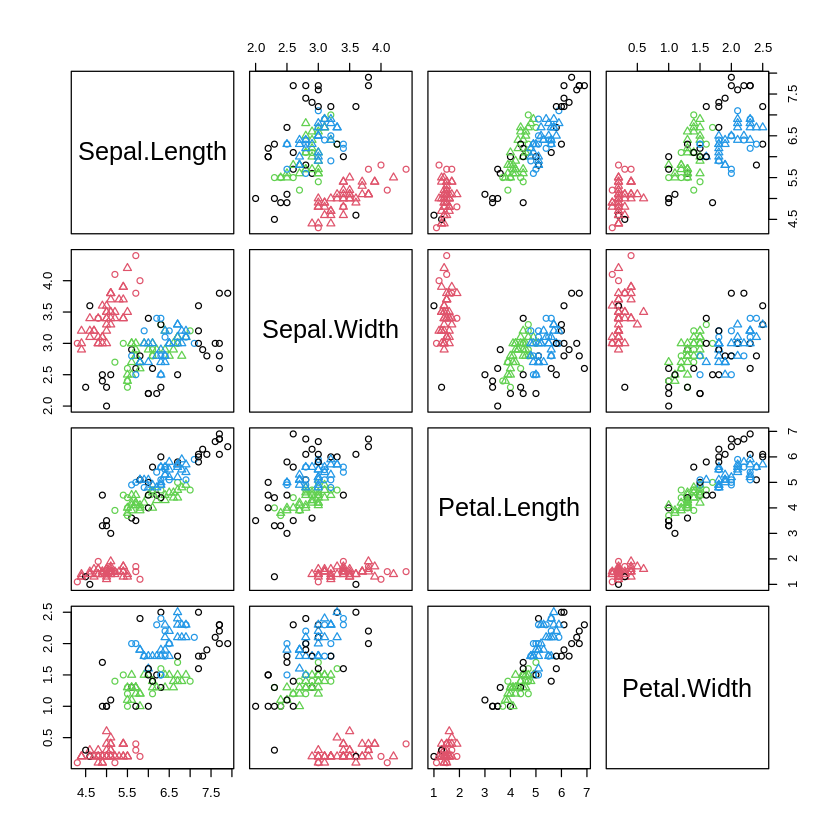

In [13]:
plot(ds, iris2)

The clusters are shown below in a scatter plot using the first and fourth columns of the data.

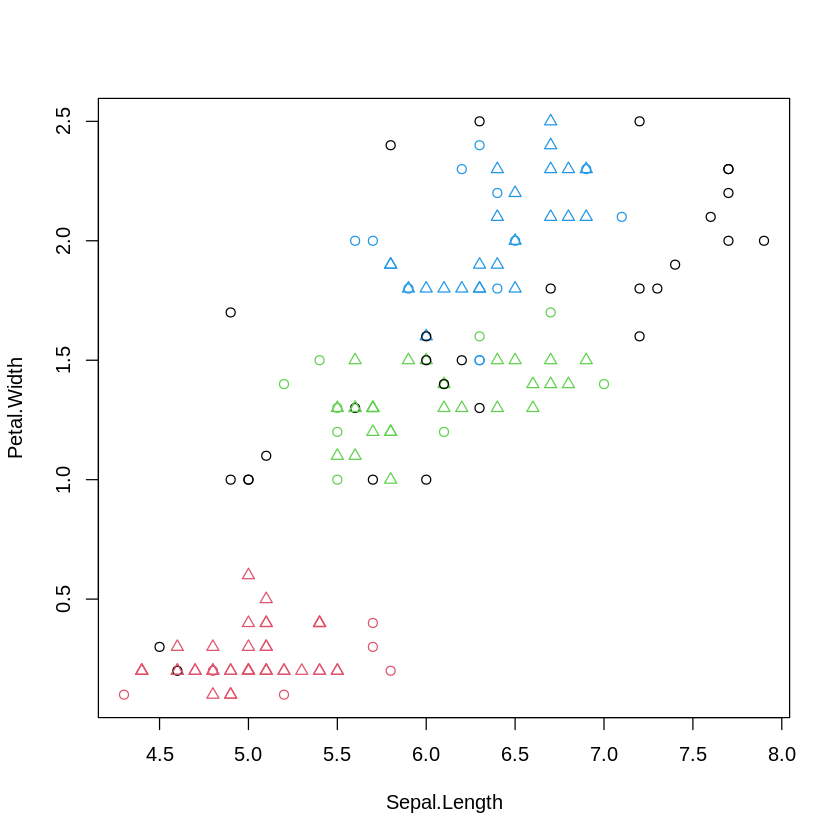

In [14]:
plot(ds, iris2[c(1,4)])

An alternative approach to visualizing the clusters is by utilizing the plotcluster() function from the fpc package. It's worth mentioning that in this representation, the data points are projected in a manner that highlights the distinctions between the different classes or clusters. This projection allows for a clearer visualization of the cluster boundaries and the separation between different groups within the dataset.

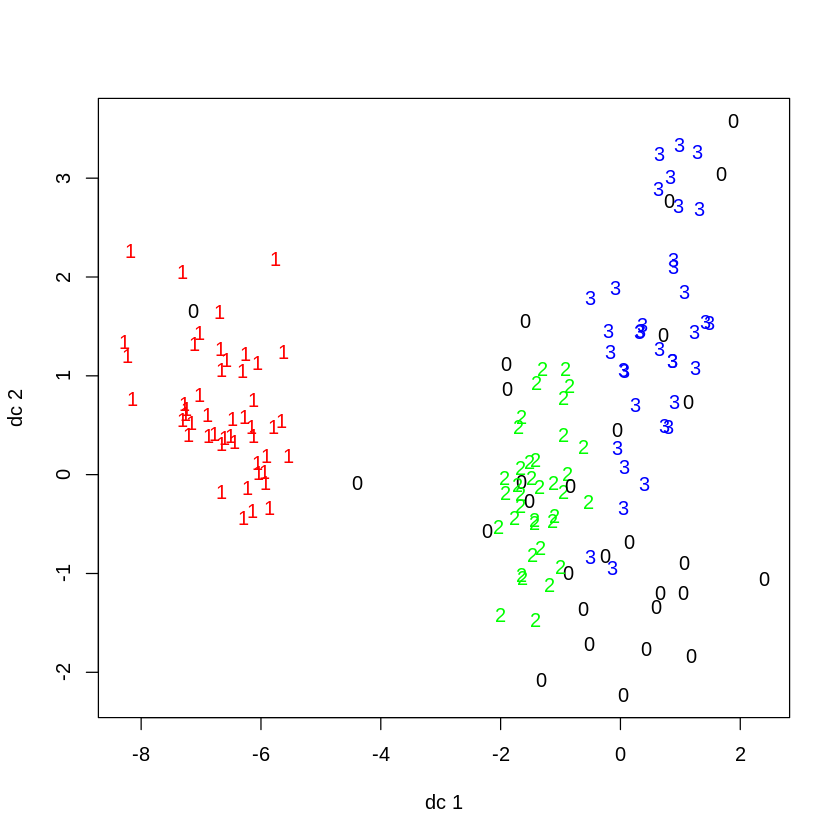

In [15]:
plotcluster(iris2, ds$cluster)

The clustering model can also be employed to assign labels to new data points by assessing their similarity to existing clusters. To illustrate this, consider the following example: a sample of 10 objects is drawn from the iris dataset, and small random noises are introduced to create a new dataset for labeling. These random noises are generated using the runif() function, which employs a uniform distribution. By comparing the new data points to the existing clusters, the clustering model can assign appropriate labels to them based on their similarity to the pre-existing clusters.

      
myPred setosa versicolor virginica
     0      0          2         0
     1      2          0         0
     2      0          3         0
     3      0          2         1

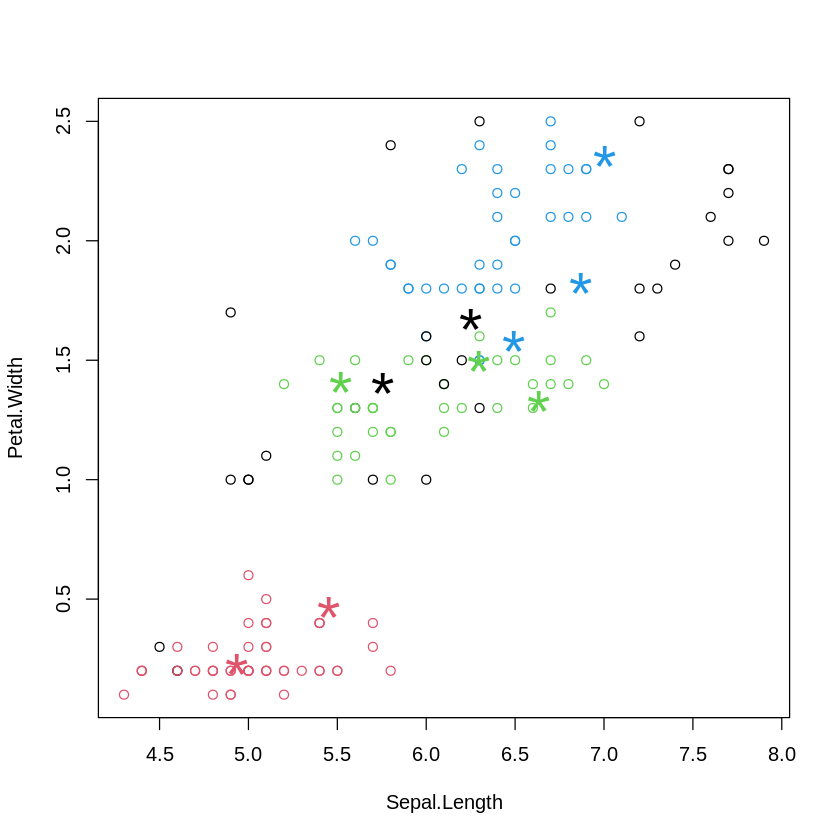

In [17]:
 # create a new dataset for labeling
set.seed(435)
idx <- sample(1:nrow(iris), 10)
newData <- iris[idx,-5]
newData <- newData + matrix(runif(10*4, min=0, max=0.2), nrow=10, ncol=4)
# label new data
myPred <- predict(ds, iris2, newData)
# plot result
plot(iris2[c(1,4)], col=1+ds$cluster)
points(newData[c(1,4)], pch="*", col=1+myPred, cex=3)
# check cluster labels
table(myPred, iris$Species[idx])

As demonstrated above, only 8 of the 10  new unlabelled data are correctly labeled.The new data are shown as asterisk(“*”) in the above figure and the colors stand for cluster labels.